In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# Import data & Set date column as index
data = pd.read_csv('fcc-forum-pageviews.csv').set_index('date')
data

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [33]:
# 2.5% percent
percent = int((len(data) * 0.025))
percent


32

In [34]:
# Filtering the data
data_ = pd.concat([data.iloc[:33], data.iloc[(len(data) - percent) - 1:,:]])
data_

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [35]:
# Transform index to time format
data.index = pd.to_datetime(data.index, format="%Y-%m-%d")
data

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


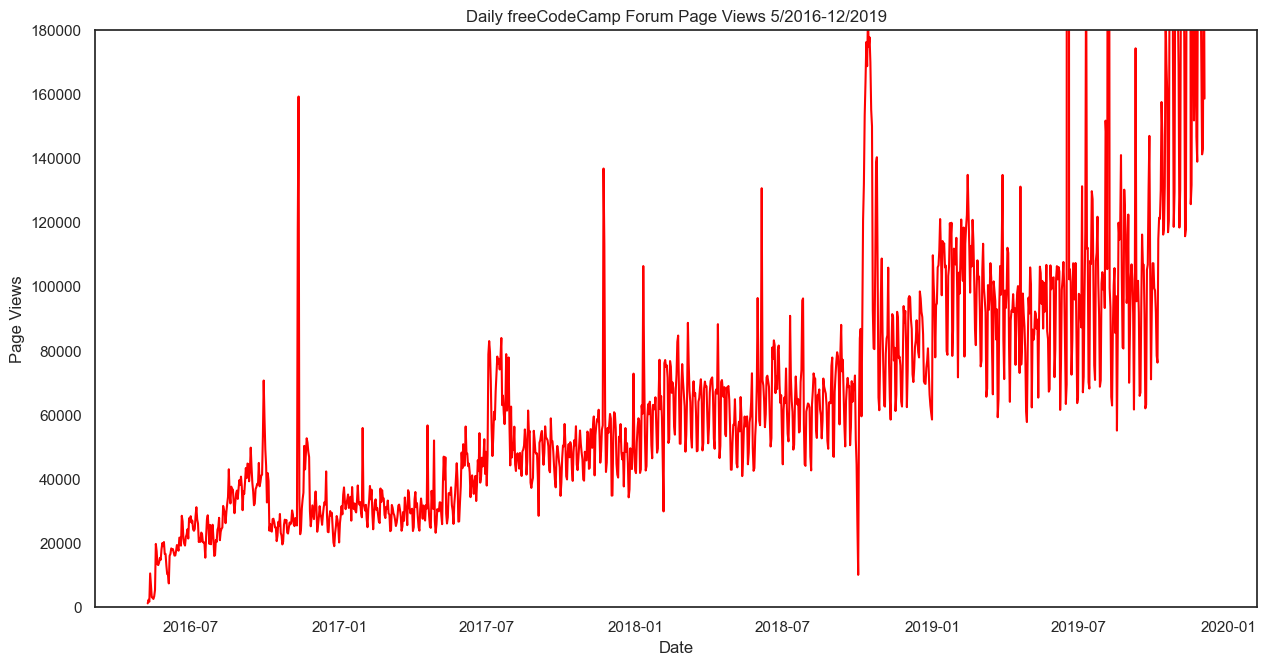

In [36]:
# draw_line_plot
title = 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'
x = 'Date'
y = 'Page Views'

def draw_line_plot(title, x, y):
    fig, ax = plt.subplots(figsize=(15, 7.5))
    plot = sns.lineplot(
        data=data, x=data.index,
        y=data['value'], color='red'
        ).set(title=title, xlabel=x, ylabel=y)
    plt.ylim(0,180000)
    sns.set_theme(font_scale=1, style="white")

draw_line_plot(title, x, y)

In [37]:
# Sorted data by month
sorted = data.groupby(pd.Grouper(freq='M')).mean().round()
sorted

,value
date,
2016-05-31,11243.0
2016-06-30,19124.0
2016-07-31,23314.0
2016-08-31,31049.0
2016-09-30,41477.0
2016-10-31,27398.0
2016-11-30,40449.0
2016-12-31,27832.0
2017-01-31,32785.0


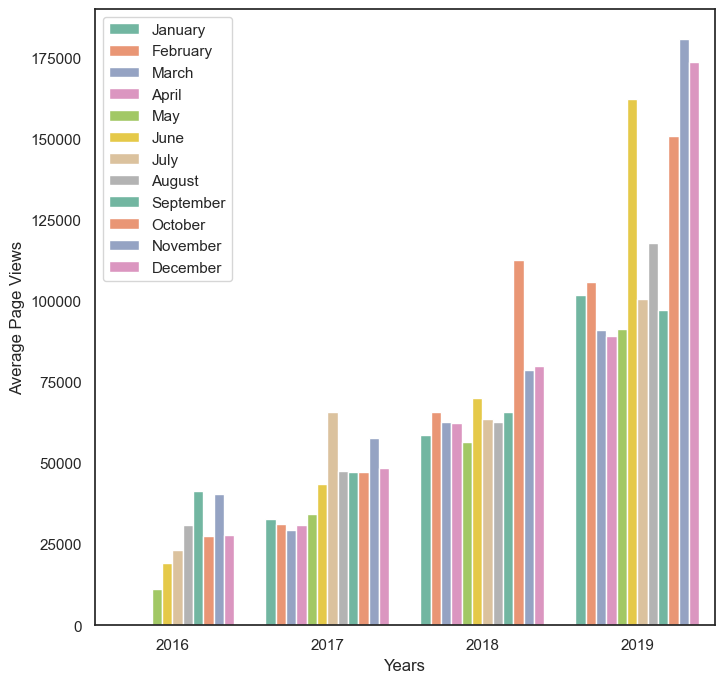

In [38]:
# draw_bar_plot

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
x_label = 'Years'
y_label = 'Average Page Views'

def draw_bar_plot(x, y):
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.barplot(
        data=sorted, x=sorted.index.year,
        y=sorted['value'], hue=sorted.index.month,
        palette='Set2', errorbar=None
        ).set(title=None, xlabel=x, ylabel=y)
    sns.set_theme(font_scale=1, style='white')
    sns.color_palette("rocket")
    plt.legend(labels=months)
    plt.show()
    
draw_bar_plot(x_label, y_label)

In [39]:
# Sort data and assign month
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df_box = data.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box = df_box.sort_values('month', key=lambda x : x.apply (lambda x : month_dict[x]))
df_box.sort_values('year')

,date,value,year,month
67,2016-07-15,22815,2016,Jul
117,2016-09-03,30250,2016,Sep
121,2016-09-07,43401,2016,Sep
119,2016-09-05,35320,2016,Sep
128,2016-09-14,43645,2016,Sep
...,...,...,...,...
1114,2019-05-28,99094,2019,May
1115,2019-05-29,100021,2019,May
1116,2019-05-30,102705,2019,May
1103,2019-05-17,101725,2019,May


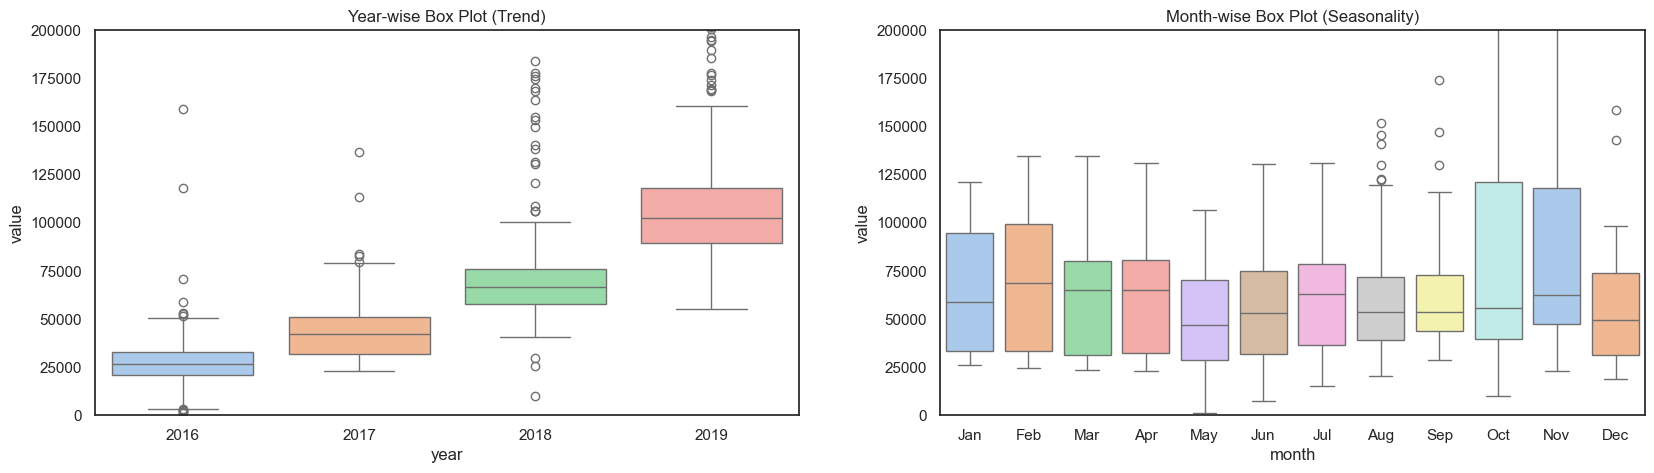

In [40]:
# draw_box_plot

titles = ['Year-wise Box Plot (Trend)', 'Month-wise Box Plot (Seasonality)']

def draw_box_plot():
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

    # Chart a
    sns.boxplot(
        data=df_box, x='year', y='value', hue=df_box.year,
        legend=False, palette="pastel", ax=ax1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_ylim((0,200000))

    # Chart b
    sns.boxplot(
        data=df_box, x='month', y='value', hue=df_box.month,
        legend=False, palette="pastel", ax=ax2)
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_ylim((0,200000))

    plt.show()

draw_box_plot()